# Neural Network with [http://scikit-learn.org/](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

"A feedforward neural network is an artificial neural network wherein connections between the nodes do not form a cycle. As such, it is different from recurrent neural networks.

The feedforward neural network was the first and simplest type of artificial neural network devised. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network." [wikipedia.org](https://en.wikipedia.org/wiki/Feedforward_neural_network)

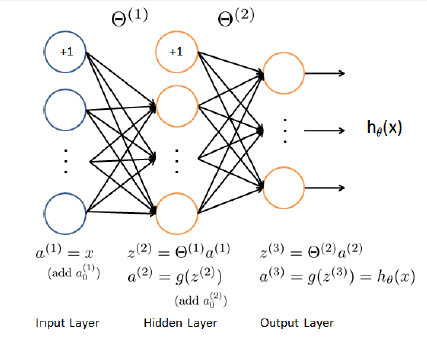


Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset.
It can learn a __non-linear function__ approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. [scikit-learn.org](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

## Regression with Neural Network

- __Regression with linear regression__

In [1]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

boston_market_data = datasets.load_boston()

boston_train_data, boston_test_data, \
boston_train_target, boston_test_target = \
train_test_split(preprocessing.StandardScaler().fit_transform(boston_market_data['data']),\
                 boston_market_data['target'], test_size=0.1, random_state=1)

print("boston_train_data.shape", boston_train_data.shape)
print("boston_test_data.shape", boston_test_data.shape)

linear_regression = LinearRegression()
linear_regression.fit(boston_train_data, boston_train_target)

print("Mean squared error of a learned linear model: %.2f" % 
      mean_squared_error(boston_test_target, linear_regression.predict(boston_test_data)))

boston_train_data.shape (455, 13)
boston_test_data.shape (51, 13)
Mean squared error of a learned linear model: 20.54


- __Regression with Feed-Forward Neural Network (MLP) using [MLPRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)__ 

In [2]:
from sklearn.neural_network import MLPRegressor

neural_network = MLPRegressor(hidden_layer_sizes=(30,20,10,), activation='logistic', solver="sgd", \
                              batch_size=20, shuffle=True, momentum=0.95, alpha=1e-5, verbose=False, \
                              max_iter=500, tol=1e-7, random_state=1)

neural_network.fit(boston_train_data, boston_train_target)

print("Mean squared error of a learned neural network model: %.2f" % 
      mean_squared_error(boston_test_target, neural_network.predict(boston_test_data)))

Mean squared error of a learned neural network model: 5.91


__Compare variance score for linear regression and neural network (nonlinear)__

In [3]:
from sklearn.metrics import r2_score
print('Variance score for linear model: %.2f' % r2_score(boston_test_target, linear_regression.predict(boston_test_data)))
print('Variance score for neural network model: %.2f' % r2_score(boston_test_target, neural_network.predict(boston_test_data)))


Variance score for linear model: 0.78
Variance score for neural network model: 0.94


### Visualizing learning process of a neural network

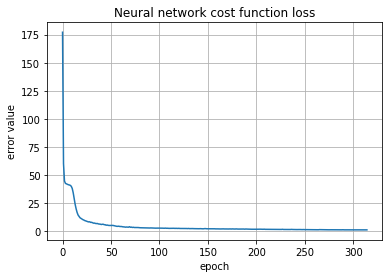

In [4]:
import matplotlib.pyplot as plt
plt.plot(neural_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

TODO: Learn about [MLPRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) class and experiment with different parameters of a neural network and check how they affect the learning process.

Mean squared error of a learned neural network model: 5.91


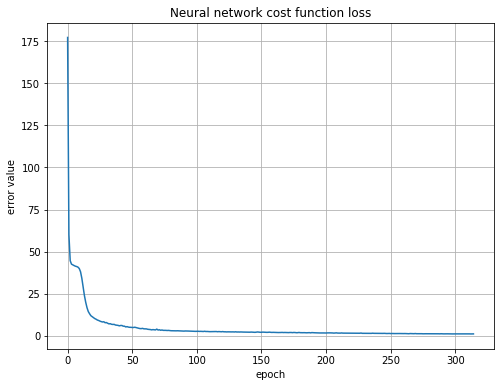

In [22]:
neural_network = MLPRegressor(hidden_layer_sizes=(30,20,10,), activation='logistic', solver="sgd", \
                              batch_size=20, shuffle=True, momentum=0.95, alpha=1e-5, verbose=False, \
                              max_iter=5000, tol=1e-7, random_state=1)

neural_network.fit(boston_train_data, boston_train_target)

print("Mean squared error of a learned neural network model: %.2f" % 
      mean_squared_error(boston_test_target, neural_network.predict(boston_test_data)))

import matplotlib.pyplot as plt
plt.plot(neural_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

__Finding metaparameters for neural network using [GridSearch()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)__

In [5]:
from sklearn.model_selection import GridSearchCV
import numpy as np



parameters = {'solver': ['adam', 'sgd'], 'max_iter': [1000], \
              'hidden_layer_sizes':[(100,), (30,20,10,)], \
              'random_state':np.arange(0,2), 'tol':[1e-7], 'batch_size':[20,60], 'shuffle':[True, False],\
              'momentum':[0.95,0.85], 'activation': ['logistic','relu'], 'alpha':[1e-5,1e-6]}

grid_search = GridSearchCV(MLPRegressor(), parameters, n_jobs=-1, verbose=1, cv=4)
grid_search.fit(boston_train_data, boston_train_target)
        
print(grid_search.score(boston_test_data, boston_test_target))
print(grid_search.best_params_)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

## Classification with Neural Network

- __Classification with Logistic regression__

In [6]:
import numpy as np

from sklearn.linear_model import LogisticRegression

from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns;

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


images_train =  []
for image_train in x_train:
    images_train.append(image_train.flatten())

images_test = []

for image_test in x_test:
    images_test.append(image_test.flatten())

images_train = np.array(images_train)
images_test = np.array(images_test)

linear_model = LogisticRegression(verbose=1, max_iter=10, multi_class="multinomial", solver="sag")

linear_model.fit(images_train, y_train)

conf_matrix = confusion_matrix(y_test, linear_model.predict(images_test))

#print("Confusion_matrix:")
#print(conf_matrix)

sns.heatmap(conf_matrix)

Using TensorFlow backend.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [9]:
acc = accuracy_score(y_test, linear_model.predict(images_test))
print("Linear model accuracy is {0:0.2f}".format(acc))

Linear model accuracy is 0.84


- __Classification with Neural Network (MLP) using [MLPClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__

Neural network model accuracy is 0.88


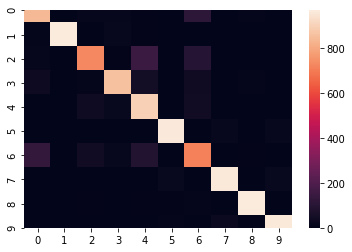

In [10]:
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(hidden_layer_sizes=(200,100,50),random_state=1)

#neural_network.fit(images_train, y_train)
neural_network.fit(preprocessing.StandardScaler().fit_transform(images_train), y_train)

conf_matrix_neural_network = confusion_matrix(y_test, neural_network.predict(preprocessing.StandardScaler().fit_transform(images_test)))

#print("Confusion_matrix:")
#print(conf_matrix_neural_network)

sns.heatmap(conf_matrix_neural_network)

acc = accuracy_score(y_test, neural_network.predict(preprocessing.StandardScaler().fit_transform(images_test)))
print("Neural network model accuracy is {0:0.2f}".format(acc))

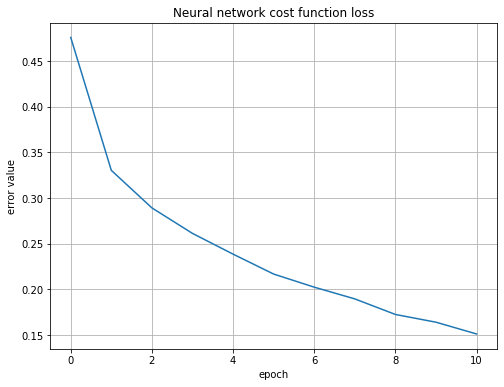

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(neural_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

In [12]:
print("Number of connection between input and first hidden layer:")
print(np.size(neural_network.coefs_[0]))

print("Number of connection between first and second hidden layer:")
print(np.size(neural_network.coefs_[1]))

Number of connection between input and first hidden layer:
156800
Number of connection between first and second hidden layer:
20000


- Visualizing weights in neural network

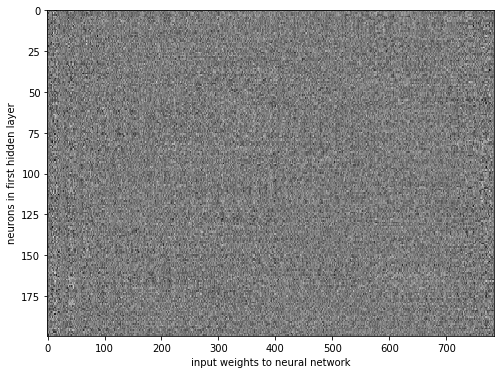

In [28]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.imshow(np.transpose(neural_network.coefs_[0]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.ylabel('neurons in first hidden layer'); plt.xlabel('input weights to neural network');

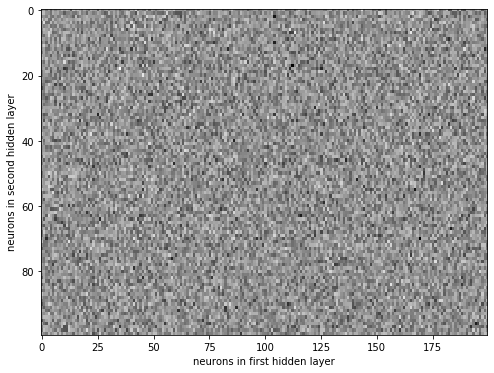

In [29]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.imshow(np.transpose(neural_network.coefs_[1]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.ylabel('neurons in second hidden layer'); plt.xlabel('neurons in first hidden layer');

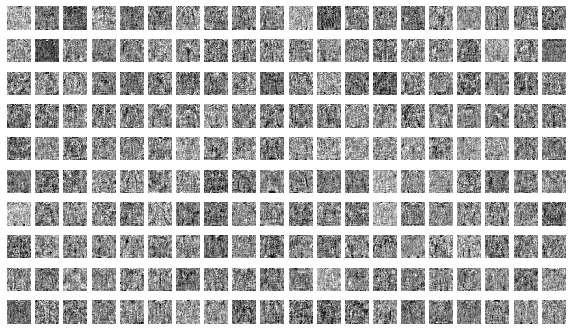

In [30]:
plt.rcParams['figure.figsize'] = [10, 60]
m=200
for i in range(0,m):
    plt.subplot(m/2, 20, i+1)
    plt.axis('off')
    hidden_2 = np.transpose(neural_network.coefs_[0])[i]
    plt.imshow(np.reshape(hidden_2, (28,28)), cmap=plt.get_cmap("gray"),  aspect=1)


### ToDo: 
1. Learn about [MLPClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) class and try find better network architecture (using learning parameters and layers) that will have higher accuracy than 0.89 on training data. (smart way would be to use [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))


2. Train Feed-Forward neural network to recognize hand written digits using Mnist dataset. Visualize learning process and weights connected to the first layer.  

In [9]:
import keras
from sklearn.neural_network import MLPClassifier
from keras.datasets import mnist
# load mnist dataset
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns;

from sklearn.neural_network import MLPClassifier

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

images_train =  []
for image_train in x_train:
    images_train.append(image_train.flatten())

images_test = []

for image_test in x_test:
    images_test.append(image_test.flatten())
    

images_train = np.array(images_train)
images_test = np.array(images_test)

neural_network = MLPClassifier(hidden_layer_sizes=(200,100,100),random_state=1, solver='adam', max_iter=100)
neural_network.fit(preprocessing.StandardScaler().fit_transform(images_train), y_train)


acc = accuracy_score(y_test, neural_network.predict(preprocessing.StandardScaler().fit_transform(images_test)))
print("Neural network model accuracy is {0:0.2f}".format(acc))

# solver='sgd'


# parameters = {'solver': ['sgd'], 'max_iter': [1000], \
#               'hidden_layer_sizes':[(10,), (30,)], \
#               'random_state':np.arange(0,2), 'tol':[1e-7], 'batch_size':[20,60], 'shuffle':[True],\
#               'momentum':[0.95,0.85], 'activation': ['relu'], 'alpha':[0.0001]}

# grid_search = GridSearchCV(MLPRegressor(), parameters, n_jobs=-5, verbose=1, cv=4)
# grid_search.fit(preprocessing.StandardScaler().fit_transform(images_train), y_train)
        
# print(grid_search.score(image_test, y_test))
# print(grid_search.best_params_)


M:\PROGRAMY\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Neural network model accuracy is 0.89


In [ ]:
# neural_network = MLPRegressor(hidden_layer_sizes=(30,20,10,), activation='logistic', solver="sgd", \
#                               batch_size=20, shuffle=True, momentum=0.95, alpha=1e-5, verbose=False, \
#                               max_iter=500, tol=1e-7, random_state=1)

# neural_network.fit(boston_train_data, boston_train_target)

# print("Mean squared error of a learned neural network model: %.2f" % 
#       mean_squared_error(boston_test_target, neural_network.predict(boston_test_data)))

Datasets size
Train data: (60000, 28, 28)
Test data: (10000,)
Samples from training data:


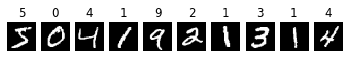

In [13]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Datasets size")
print("Train data:", x_train.shape)
print("Test data:", y_test.shape)

print("Samples from training data:")
for i in range(0,10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap("gray"))
    plt.title(y_train[i]);
    plt.axis('off');

In [46]:
# For fun try using NN for CIFAR-10 classification and test it on real data!

Neural network model accuracy is 0.87


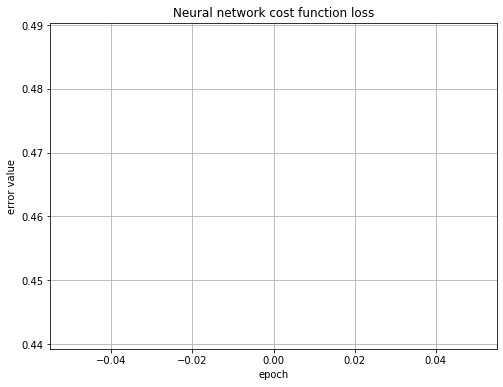

In [18]:
import keras
from keras.datasets import mnist
# load mnist dataset
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns;

from sklearn.neural_network import MLPClassifier

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images_train =  []
for image_train in x_train:
    images_train.append(image_train.flatten())

images_test = []

for image_test in x_test:
    images_test.append(image_test.flatten())
    

images_train = np.array(images_train)
images_test = np.array(images_test)

neural_network = MLPClassifier(hidden_layer_sizes=(200,100,50),random_state=1, solver='lbfgs', max_iter=10)
neural_network.fit(preprocessing.StandardScaler().fit_transform(images_train), y_train)


acc = accuracy_score(y_test, neural_network.predict(preprocessing.StandardScaler().fit_transform(images_test)))
print("Neural network model accuracy is {0:0.2f}".format(acc))


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(neural_network.loss_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();



# plt.rcParams['figure.figsize'] = (8.0, 6.0)
# plt.imshow(np.transpose(neural_network.coefs_[0]), cmap=plt.get_cmap("gray"), aspect="auto")
# plt.ylabel('neurons in first hidden layer'); plt.xlabel('input weights to neural network');


# solver='sgd'


# parameters = {'solver': ['sgd'], 'max_iter': [1000], \
#               'hidden_layer_sizes':[(10,), (30,)], \
#               'random_state':np.arange(0,2), 'tol':[1e-7], 'batch_size':[20,60], 'shuffle':[True],\
#               'momentum':[0.95,0.85], 'activation': ['relu'], 'alpha':[0.0001]}

# grid_search = GridSearchCV(MLPRegressor(), parameters, n_jobs=-5, verbose=1, cv=4)
# grid_search.fit(preprocessing.StandardScaler().fit_transform(images_train), y_train)
        
# print(grid_search.score(image_test, y_test))
# print(grid_search.best_params_)
